In [254]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cycler import cycler
import matplotlib as mpl

In [255]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#D6E4FA', '#F6C8C6', '#FFF0C9', '#DCCFE2', '#D0E4D0', '#FEE3C8', '#DCCFE2', '#D0E4D0', '#FEE3C8', '#F6C8C6', '#FFF0C9', '#D6E4FA'])
figwidth = 25
figheight = 5

In [256]:
df = pd.read_csv('data/clean.csv')
len(df)

4143

In [257]:
df = df.drop_duplicates()
len(df)

3264

In [258]:
df = df[~df['genus'].isnull()]
len(df)

3263

In [259]:
df = df[~df['species'].isnull()]
len(df)

2837

In [260]:
min_mask = (df['sequence'].str.len() > 500)
max_mask = (df['sequence'].str.len() < 20000)
df = df.loc[min_mask]
df = df.loc[max_mask]
len(df)

1950

In [261]:
df = df.groupby('genus').filter(lambda x: len(x) > 80)
len(df)

1283

In [262]:
df = df[~df['sequence'].isin(df['sequence'][df['sequence'].duplicated()])].sort_values('sequence')
len(df)

1266

In [263]:
df.to_csv('data/genus_500_20k_min_80.csv', index=False)

### Data classes by count

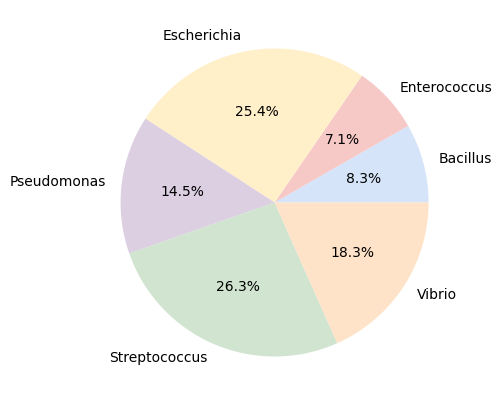

In [265]:
f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
df1 = df.groupby('genus')['genus'].count()
ax = df.groupby('genus')['genus'].count().plot.pie(autopct='%1.1f%%')
ax.yaxis.set_visible(False)

### Data classes by count

<BarContainer object of 6 artists>

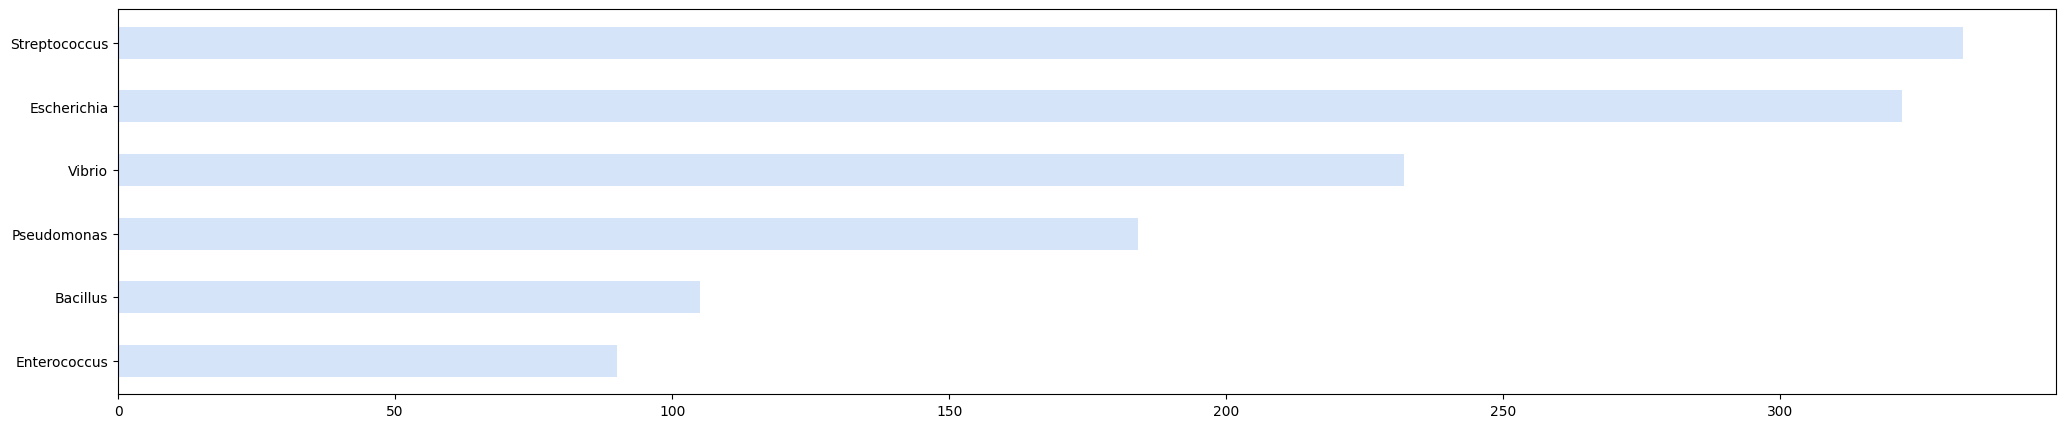

In [266]:
df2 = df.groupby('genus')['sequence'].aggregate([lambda x: x.str.len().min(), lambda x: x.str.len().max()]).reset_index()
df2 = df2.rename(columns={'<lambda_0>': 'min_sequence_length', '<lambda_1>': 'max_sequence_length'})
df2['count'] = df.groupby(['genus'])['genus'].count().reset_index(name='count')['count']

f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
df_sorted = df2.sort_values('count')
plt.barh(df_sorted['genus'], df_sorted['count'], height=0.5)

### Data classes by min and max lenght of sequence

<BarContainer object of 6 artists>

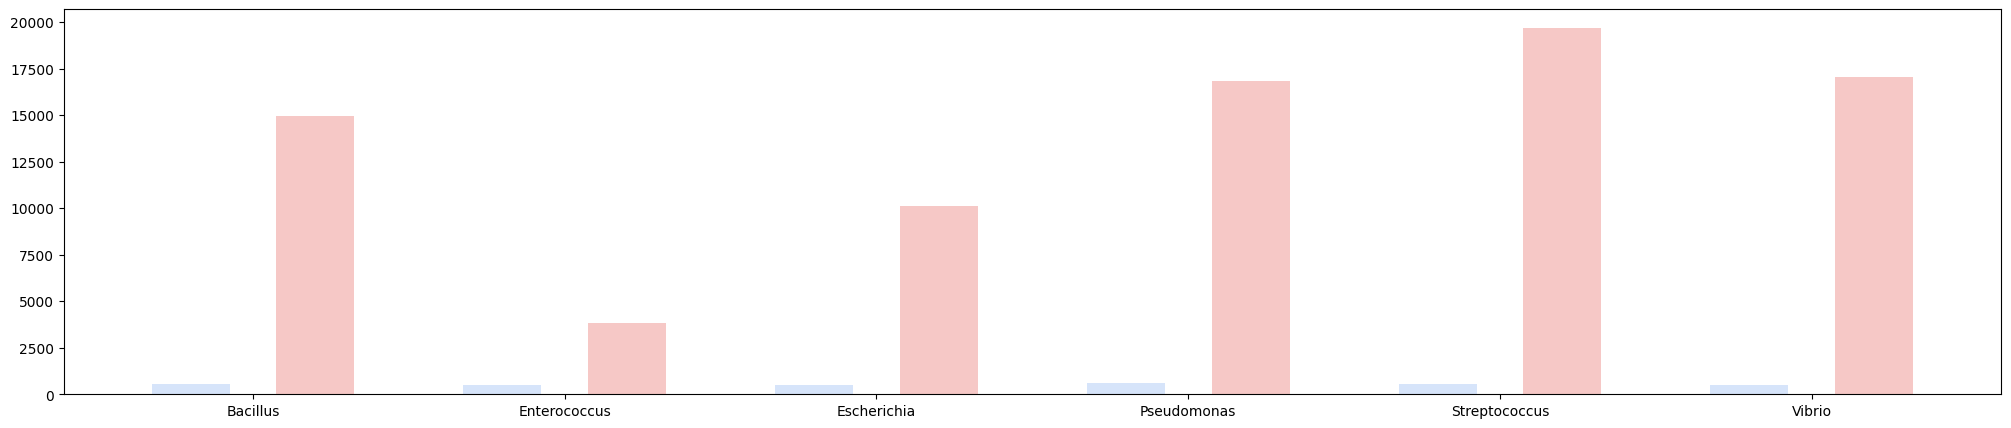

In [267]:
f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
x_axis = np.arange(len(df2['genus']))
plt.xticks(x_axis, df2['genus'])
plt.bar(x_axis -0.2, df2['min_sequence_length'], width=0.25, label = 'min')
plt.bar(x_axis +0.2, df2['max_sequence_length'], width=0.25, label = 'max')